## Model Training

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd

In [2]:
# Make a directory to store your training images in.
!mkdir train

In [3]:
# Put the cat training set into the directory
!unzip /content/airplane.zip -d /content/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/airplane/img10010.png  
  inflating: /content/train/airplane/img10043.png  
  inflating: /content/train/airplane/img10064.png  
  inflating: /content/train/airplane/img10115.png  
  inflating: /content/train/airplane/img10146.png  
  inflating: /content/train/airplane/img10205.png  
  inflating: /content/train/airplane/img10297.png  
  inflating: /content/train/airplane/img10365.png  
  inflating: /content/train/airplane/img1039.png  
  inflating: /content/train/airplane/img10399.png  
  inflating: /content/train/airplane/img1044.png  
  inflating: /content/train/airplane/img10513.png  
  inflating: /content/train/airplane/img10574.png  
  inflating: /content/train/airplane/img10607.png  
  inflating: /content/train/airplane/img10716.png  
  inflating: /content/train/airplane/img10764.png  
  inflating: /content/train/airplane/img10776.png  
  inflating: /content/train/airplane/img10811.png  
  inflating: /c

In [4]:
# Put the deer training set into the directory
!unzip /content/truck.zip -d /content/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/truck/img10149.png  
  inflating: /content/train/truck/img10219.png  
  inflating: /content/train/truck/img10257.png  
  inflating: /content/train/truck/img10306.png  
  inflating: /content/train/truck/img10351.png  
  inflating: /content/train/truck/img10388.png  
  inflating: /content/train/truck/img10523.png  
  inflating: /content/train/truck/img10533.png  
  inflating: /content/train/truck/img10626.png  
  inflating: /content/train/truck/img10658.png  
  inflating: /content/train/truck/img10659.png  
  inflating: /content/train/truck/img10743.png  
  inflating: /content/train/truck/img1075.png  
  inflating: /content/train/truck/img10781.png  
  inflating: /content/train/truck/img10806.png  
  inflating: /content/train/truck/img10853.png  
  inflating: /content/train/truck/img10934.png  
  inflating: /content/train/truck/img10972.png  
  inflating: /content/train/truck/img1102.png  
  inflating: /conten

In [5]:
# Put the bird training set into the directory
!unzip /content/car.zip -d /content/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/car/img10039.png  
  inflating: /content/train/car/img10100.png  
  inflating: /content/train/car/img10133.png  
  inflating: /content/train/car/img10229.png  
  inflating: /content/train/car/img10276.png  
  inflating: /content/train/car/img10359.png  
  inflating: /content/train/car/img10403.png  
  inflating: /content/train/car/img10458.png  
  inflating: /content/train/car/img10568.png  
  inflating: /content/train/car/img1064.png  
  inflating: /content/train/car/img10679.png  
  inflating: /content/train/car/img1068.png  
  inflating: /content/train/car/img10755.png  
  inflating: /content/train/car/img10771.png  
  inflating: /content/train/car/img10797.png  
  inflating: /content/train/car/img10819.png  
  inflating: /content/train/car/img10824.png  
  inflating: /content/train/car/img10846.png  
  inflating: /content/train/car/img10868.png  
  inflating: /content/train/car/img10895.png  
  inflating

In [6]:
# Load the images from the directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            images.append(img)
    return images

# The folder paths your images are located in.  You will change these for your directories.
folder_paths = ['/content/train/airplane', '/content/train/car', '/content/train/truck']

# The class names/labels of your images.
class_labels = {'airplane': 0, 'car': 1, 'truck': 2}

# The lists to store your images and labels in.
x_train = []
y_train = []

# Load the images and labels into the lists.
for folder_path in folder_paths:
    class_name = os.path.basename(folder_path)
    class_id = class_labels[class_name]
    images = load_images_from_folder(folder_path)

    # Extend the lists to add the images and labels from the loaded folder.
    x_train.extend(images)
    y_train.extend([class_id] * len(images))

# Convert the loaded lists into numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [7]:
# Print the shape of the training data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Print the first 10 labels
print(f"Sample labels: {y_train[:10]}")
# ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(None, 64, 64, 3)

x_train shape: (15000, 64, 64, 3)
y_train shape: (15000,)
Sample labels: [0 0 0 0 0 0 0 0 0 0]


In [8]:
## !!!! There's is a bug in this step, the model is not training with normalized data!!!
# Normalize the training data
x_train = x_train.astype('float32') / 255.0

In [9]:
# Let's build out model.

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# import to_categorical from tensorflow
from tensorflow.keras.utils import to_categorical
# save each epoch of the model
from keras.callbacks import ModelCheckpoint

# Define the checkpoint callback
checkpoint_path = "best_model.tf"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

# Define the VGG16 architecture
model = keras.Sequential([
    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 4
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 5
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Fully connected layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
# history = model.fit(x_train, y_train, epochs=20,  batch_size=32, shuffle=True, validation_split=0.1, callbacks=[checkpoint])


In [10]:
history = model.fit(x_train, y_train, epochs=20,  batch_size=32, shuffle=True, validation_split=0.1, callbacks=[checkpoint])

Epoch 1/20
422/422 [==============================] - ETA: 0s - loss: 1.0873 - accuracy: 0.3914
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.tf
422/422 [==============================] - 33s 62ms/step - loss: 1.0873 - accuracy: 0.3914 - val_loss: 1.3471 - val_accuracy: 0.0000e+00
Epoch 2/20
421/422 [============================>.] - ETA: 0s - loss: 1.0789 - accuracy: 0.4544
Epoch 2: val_accuracy did not improve from 0.00000
422/422 [==============================] - 22s 51ms/step - loss: 1.0788 - accuracy: 0.4547 - val_loss: 1.3460 - val_accuracy: 0.0000e+00
Epoch 3/20
421/422 [============================>.] - ETA: 0s - loss: 1.0027 - accuracy: 0.5030
Epoch 3: val_accuracy improved from 0.00000 to 0.51600, saving model to best_model.tf
422/422 [==============================] - 24s 56ms/step - loss: 1.0026 - accuracy: 0.5032 - val_loss: 1.0369 - val_accuracy: 0.5160
Epoch 4/20
422/422 [==============================] - ETA: 0s - loss: 0.8851 - accura

In [11]:
model.save("airplane_truck_car.keras")

# Model Evaluation

In [12]:
# Code showing the accuracy of your model.
model.evaluate(x_train, y_train)

469/469 [==============================] - 8s 17ms/step - loss: 0.1495 - accuracy: 0.9496


[0.14954954385757446, 0.9495999813079834]

# Object Detection

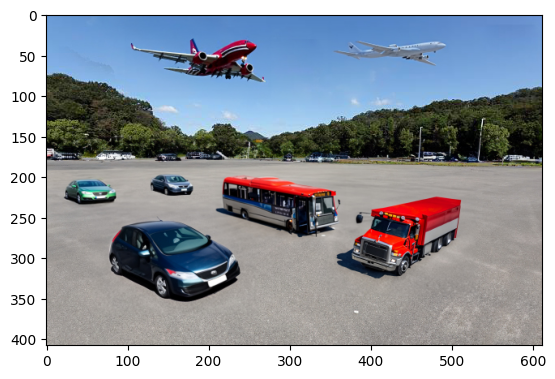

In [13]:
# Code for your object detector goes here

# Import an image
img_1 = cv2.imread("/content/car_truck_airplane.jpg")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
#Let's do the conversion in imshow
plt.imshow(img_1)

In [14]:
def adjust_brightness_contrast(image_array, alpha, beta):
# Convert to floating point to avoid overflow and underflow
  temp = image_array.astype('float32')
# Adjust contrast
  temp *= alpha
# Adjust brightness
  temp += beta
# Clip values to be in the range [0, 255]
  temp = np.clip(temp, 0, 255)
  return temp.astype('uint8')


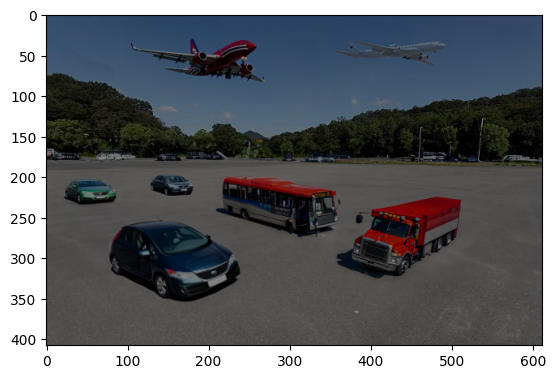

In [15]:
adjusted_img = adjust_brightness_contrast(img_1, 0.5, 0.03)
copy_img = adjusted_img.copy()
plt.imshow(adjusted_img)

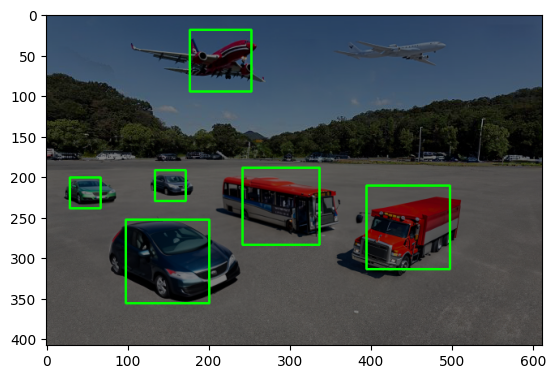

In [16]:
# img_1 = cv2.imread("/content/car_truck_airplane.jpg")
# img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

image = adjusted_img

# Setup SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 0
params.maxThreshold = 255
# Filter by Area
params.filterByArea = True
params.minArea = 1000
params.maxArea = 100000

params.filterByColor = False

# Filter by Circularity
params.filterByCircularity = 1
params.minCircularity = 0.02
params.maxCircularity = 0.9
# Filter by Convexity
params.filterByConvexity = 1
params.minConvexity = 0.1
params.maxConvexity = 1
    # Filter by Inertia
params.filterByInertia = 1
params.minInertiaRatio = 0.1
params.maxInertiaRatio = 0.9

detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)
obj=[]
c=0
for keypoint in keypoints:
    x, y, w, h = int(keypoint.pt[0] - keypoint.size / 2), int(keypoint.pt[1] - keypoint.size / 2), int(keypoint.size), int(keypoint.size)
    tup=(x,y,w,h)
    obj.append(tup)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    c=c+1
# fig = plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.show()


# Classification of Detected Objects

In [17]:
model = tf.keras.models.load_model('/content/airplane_truck_car.keras')

In [18]:
class_labels = {'airplane': 0, 'car': 1, 'truck': 2}
def get_key_by_value(dictionary, search_value):
    for key, value in dictionary.items():
        if value == search_value:
            return key
    # If the value is not found, you might want to handle this case accordingly
    return None

In [19]:
for x in range(0,c):
      x1=obj[x][0]
      x2=obj[x][1]
      y1=obj[x][2]
      y2=obj[x][3]
      print(x1,x2,y1,y2)
      img_masked=image[x2:x2+y2,x1:x1+y1]
      img_masked=tf.image.resize_with_pad(img_masked,64, 64,method=tf.image.ResizeMethod.BILINEAR,antialias=False)
      processed_obj = np.expand_dims(img_masked, axis=0)
      processed_obj = processed_obj / 255.0  # Normalize pixel values
      predictions = model.predict(processed_obj)
      predicted_class = np.argmax(predictions)
      result_key = get_key_by_value(class_labels, predicted_class)
      print(f"Predicted Class: {result_key}")
      text = result_key
      position = (x1,x2)  # x, y coordinates
      font = cv2.FONT_HERSHEY_SIMPLEX
      font_scale = 0.8
      color = (255, 255, 255)  # White color in BGR
      thickness = 2

      # Put the text on the image
      cv2.putText(image, text, position, font, font_scale, color, thickness)
      # plt.imshow(img_masked)


98 253 103 103
1/1 [==============================] - 1s 798ms/step
Predicted Class: car
242 189 95 95
1/1 [==============================] - 0s 18ms/step
Predicted Class: truck
395 211 103 103
1/1 [==============================] - 0s 18ms/step
Predicted Class: truck
177 19 76 76
1/1 [==============================] - 0s 17ms/step
Predicted Class: airplane
29 201 38 38
1/1 [==============================] - 0s 18ms/step
Predicted Class: car
134 192 38 38
1/1 [==============================] - 0s 19ms/step
Predicted Class: car


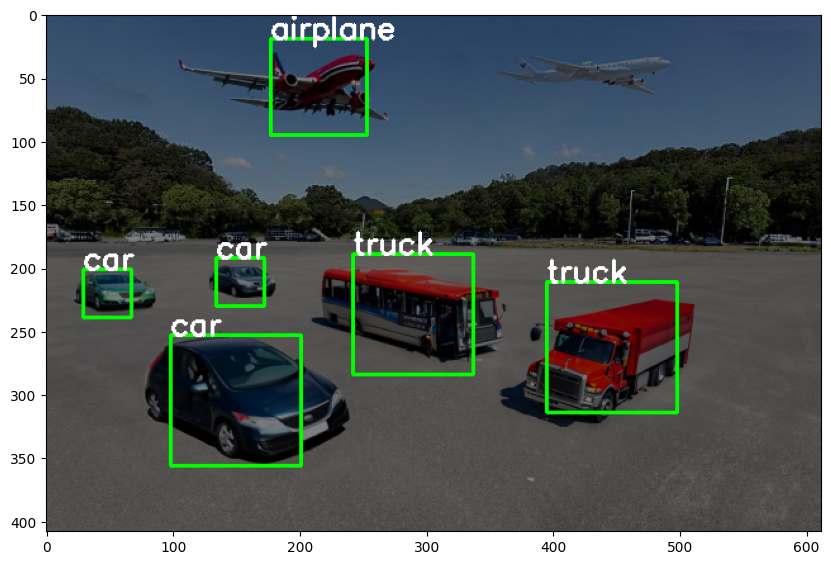

In [20]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.show()

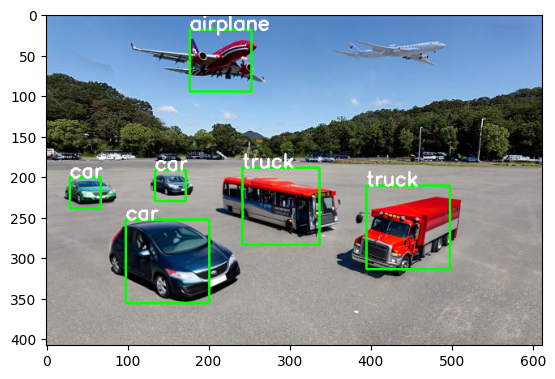

In [21]:
adjusted_img = adjust_brightness_contrast(image, 2, 0)
copy_img = adjusted_img.copy()
plt.imshow(adjusted_img)